In [ ]:
import torch
import numpy as np
import random
import pandas as pd

def fixSeeds():
  # To make random weights in NN consistent from launch to launch on this device
  # To actually distinguish an improvement
  random.seed(0)
  np.random.seed(0)
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  torch.backends.cudnn.deterministic = True

fixSeeds()

In [ ]:
from torchvision import datasets
from torchvision import transforms

tensor_transform = transforms.ToTensor()

dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)

loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

In [ ]:
import torch.nn as nn

class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 36),
        nn.ReLU(),
        nn.Linear(36, 18),
        nn.ReLU(),
        nn.Linear(18, 9)
    )

    self.decoder = nn.Sequential(
      nn.Linear(9, 18),
      nn.ReLU(),
      nn.Linear(18, 36),
      nn.ReLU(),
      nn.Linear(36, 64),
      nn.ReLU(),
      nn.Linear(64, 128),
      nn.ReLU(),
      nn.Linear(128, 28 * 28),
      nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = AutoEncoder().to(device)
  
loss_function = torch.nn.MSELoss()
  
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

Streaming output truncated to the last 5000 lines.
tensor(0.0726, device='cuda:0')
tensor(0.0724, device='cuda:0')
tensor(0.0730, device='cuda:0')
tensor(0.0723, device='cuda:0')
tensor(0.0666, device='cuda:0')
tensor(0.0640, device='cuda:0')
tensor(0.0668, device='cuda:0')
tensor(0.3254, device='cuda:0')
tensor(0.1485, device='cuda:0')
tensor(0.0744, device='cuda:0')
tensor(0.0748, device='cuda:0')
tensor(0.0624, device='cuda:0')
tensor(0.0718, device='cuda:0')
tensor(0.0667, device='cuda:0')
tensor(0.0736, device='cuda:0')
tensor(0.0724, device='cuda:0')
tensor(0.0729, device='cuda:0')
tensor(0.0704, device='cuda:0')
tensor(0.0667, device='cuda:0')
tensor(0.0723, device='cuda:0')
tensor(0.0678, device='cuda:0')
tensor(0.1484, device='cuda:0')
tensor(0.1552, device='cuda:0')
tensor(0.1485, device='cuda:0')
tensor(0.1505, device='cuda:0')
tensor(0.1556, device='cuda:0')
tensor(0.1624, device='cuda:0')
tensor(0.1554, device='cuda:0')
tensor(0.1533, device='cuda:0')
tensor(0.1553, device

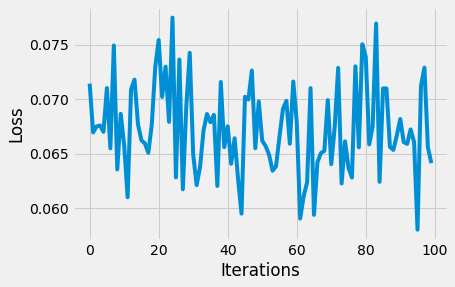

In [ ]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:

      image = image.reshape(-1, 28*28).to(device)
        
      reconstructed = model(image)
        
      loss = loss_function(reconstructed, image)
        
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      print(loss.data)
      losses.append(loss.data)
    outputs.append((epochs, image, reconstructed))

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
plt.plot(losses[-100:])

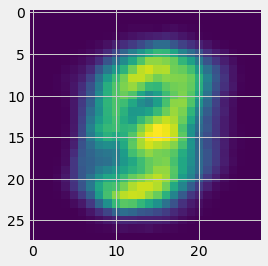

In [ ]:
for i, item in enumerate(image):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].cpu())
  
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].cpu().detach().numpy())